hhh

In [4]:
import pandas as pd

df = pd.read_csv("dataset_tomat.csv")
df

,berat,kekenyalan,kadar_gula,tebal_kulit,grade
0,95,8.5,4.8,0.85,Ekspor
1,88,9.2,5.1,0.90,Ekspor
2,102,8.8,4.9,0.82,Ekspor
3,110,8.1,4.6,0.88,Ekspor
4,92,9.0,5.0,0.87,Ekspor
...,...,...,...,...,...
85,180,4.2,3.0,0.57,Industri
86,208,3.4,2.8,0.53,Industri
87,172,4.7,3.2,0.59,Industri
88,188,4.0,2.9,0.56,Industri


In [7]:
df.head(2)

,berat,kekenyalan,kadar_gula,tebal_kulit,grade
0,95,8.5,4.8,0.85,Ekspor
1,88,9.2,5.1,0.90,Ekspor


In [10]:
df.tail()

,berat,kekenyalan,kadar_gula,tebal_kulit,grade
85,180,4.2,3.0,0.57,Industri
86,208,3.4,2.8,0.53,Industri
87,172,4.7,3.2,0.59,Industri
88,188,4.0,2.9,0.56,Industri
89,198,3.6,2.6,0.54,Industri


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   berat        90 non-null     int64  
 1   kekenyalan   90 non-null     float64
 2   kadar_gula   90 non-null     float64
 3   tebal_kulit  90 non-null     float64
 4   grade        90 non-null     object 
dtypes: float64(3), int64(1), object(1)
memory usage: 3.6+ KB


In [15]:
df.columns

Index(['berat', 'kekenyalan', 'kadar_gula', 'tebal_kulit', 'grade'], dtype='object')

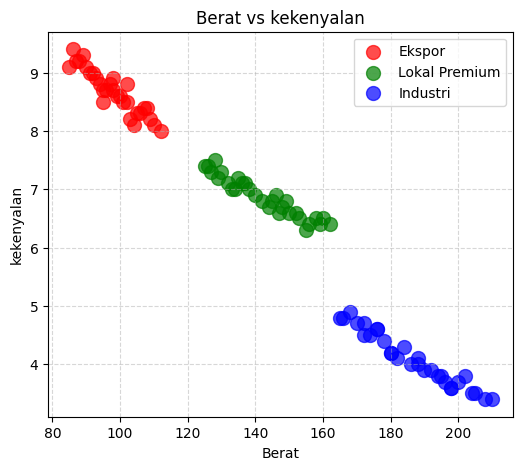

In [18]:
import matplotlib.pyplot as plt

ekspor = df[df["grade"]=="Ekspor"]
lokal_premium = df[df["grade"]=="Lokal Premium"]
industri = df[df["grade"]=="Industri"]

plt.figure(figsize=(6,5))

plt.scatter(ekspor["berat"], ekspor["kekenyalan"], s=100,alpha=0.7,color="red",label="Ekspor")
plt.scatter(lokal_premium["berat"], lokal_premium["kekenyalan"], s=100,alpha=0.7,color="green",label="Lokal Premium")
plt.scatter(industri["berat"], industri["kekenyalan"], s=100,alpha=0.7,color="blue",label="Industri")

plt.xlabel("Berat")
plt.ylabel("kekenyalan")
plt.title("Berat vs kekenyalan")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

X = df[["berat", "kekenyalan", "kadar_gula", "tebal_kulit"]]
y = df["grade"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# kita buat otak baru 
model = LogisticRegression()
# kita suruh otak belajar
model.fit(X_train_scaled, y_train)
# kita suruh otak untuk mengerjakan test, kita simpan jawabannya di y_pred
y_pred = model.predict(X_test_scaled)

#cek jawabannya, sama tidak dengan kunci jawabannya
print("Akurasi :", accuracy_score(y_test, y_pred))

Akurasi : 1.0


In [32]:
data_baru = pd.DataFrame([[80,8,4,0.8]],columns=["berat", "kekenyalan", "kadar_gula", "tebal_kulit"])
data_baru_scaled = scaler.transform(data_baru)
model.predict(data_baru_scaled)[0]

print(model.classes_)
print(model.predict_proba(data_baru_scaled)[0])

print ("--------")
prediksi = model.predict(data_baru_scaled)[0]
presentase = max(model.predict_proba(data_baru_scaled)[0])
print(f"Model memprediksi {prediksi} dengan tingkat keyakinan {presentase*100:.2f}%")

['Ekspor' 'Industri' 'Lokal Premium']
[0.71709205 0.00089314 0.28201482]
--------
Model memprediksi Ekspor dengan tingkat keyakinan 71.71%


In [33]:
import joblib

joblib.dump(model, "model_klasifikasi_tomat.joblib")
joblib.dump(scaler, "scaler_klasifikasi_tomat.joblib")

['scaler_klasifikasi_tomat.joblib']